# The objective of this project is to:

1.Identify variables that increase the likelihood of a person quitting through exploratory analysis 

2.Build a regression model to predict which employees will leave based on these features

In [4]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
data=pd.read_csv(r'C:\\Users\\We care\\HR_comma_sep.csv')

In [19]:
data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
data.tail(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [236]:
data.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
6677,0.52,0.68,4,233,2,0,0,0,technical,medium
12634,0.82,0.92,5,225,5,0,1,0,sales,low
450,0.81,0.90,4,226,5,0,1,0,product_mng,medium
9515,0.54,0.46,2,98,4,0,0,0,support,low
7913,0.84,0.98,4,134,5,1,0,0,support,medium
9992,0.37,0.85,2,185,3,0,0,0,product_mng,low
9869,0.77,0.71,5,204,3,0,0,0,sales,high
6896,0.96,1.00,3,231,6,0,0,0,sales,medium
678,0.43,0.47,2,158,3,0,1,0,product_mng,low
11846,0.76,0.62,5,230,3,1,0,0,marketing,low


In [33]:
data.rename(columns={'sales': 'department'}, inplace = True)

In [21]:
data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [47]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


From the descriptive analysis it is concluded that approximately 24% os the employees left the company. The satisfaction level is around 62% and performance is around 72%. Employees work in average on 4 projects with 200 hours worked per month.

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB



 This dataset has 14,999 samples, and 10 attributes(6 integer, 2 float, and 2 objects). No variable column has null/missing values. 10 attributes are described in detail as:

satisfaction_level: It is employee satisfaction point, which ranges from 0-1. last_evaluation: It is evaluated performance by the employer, which also ranges from 0-1. number_projects: How many numbers of projects assigned to an employee? average_monthly_hours: How many average numbers of hours worked by an employee in a month? time_spent_company: time_spent_company means employee experience. The number of years spent by an employee in the company. work_accident: Whether an employee has had a work accident or not. promotion_last_5years: Whether an employee has had a promotion in the last 5 years or not. Departments: Employee's working department/division. Salary: Salary level of the employee such as low, medium and high. left: Whether the employee has left the company or not.   

In [15]:
#How many employees work in each department?
print(data['department'].value_counts())

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64


In [40]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [41]:
data.isna().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

In [42]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [16]:
data['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [242]:
data['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [45]:
#How many employees per salary range?
#The employees salary is divided in Low (1), Medium (2) and High (3)

In [243]:
print(data['salary'].value_counts())

low       7316
medium    6446
high      1237
Name: salary, dtype: int64


In [47]:
#How many employees per salary range and department?

In [244]:
table = data.pivot_table(values="satisfaction_level", index="department", columns="salary",aggfunc=np.count_nonzero)
table

salary,high,low,medium
department,,,
IT,83.0,609.0,535.0
RandD,51.0,364.0,372.0
accounting,74.0,358.0,335.0
hr,45.0,335.0,359.0
management,225.0,180.0,225.0
marketing,80.0,402.0,376.0
product_mng,68.0,451.0,383.0
sales,269.0,2099.0,1772.0
support,141.0,1146.0,942.0


# Outlier detection & handling

In [49]:
%matplotlib inline 

import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

(array([1, 2, 3, 4, 5]),
 [Text(1, 0, 'number_project'),
  Text(2, 0, 'average_montly_hours'),
  Text(3, 0, 'time_spend_company'),
  Text(4, 0, 'Work_accident'),
  Text(5, 0, 'promotion_last_5years')])

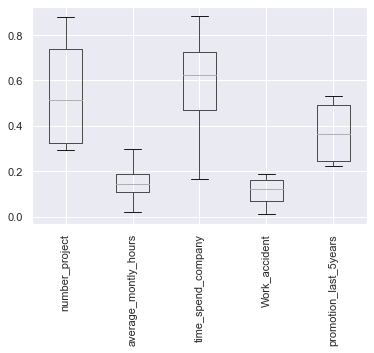

In [50]:
data = pd.DataFrame(data = np.random.random(size=(4,5)), columns = ['number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years'],)
data.boxplot()
plt.xticks(rotation=90)


In [51]:
# No outliers are detected in any of the features

# Encoding

In [52]:
#Since object columns salary and department have more than two categories,One hot encoding is being done:

In [53]:
#Encoding all categorical features using one hot encoding

In [35]:
for i in ['salary', 'department']:
    x=pd.get_dummies(data[i])
    data=pd.concat([data,x],axis=1)

In [36]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,...,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0


In [37]:
data = pd.get_dummies(data=data, columns=['department', 'salary'])
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,high,low,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0


# Preparing the Data

In [94]:
# Split the data into feature data and target data (x and y, respectively)

In [95]:
# Extract feature columns

In [42]:
x=data.loc[:, data.columns != 'left']
x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,high,low,medium,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [97]:
# Extract target column 'passed'

In [43]:
y=pd.DataFrame(data['left'])
y.head()

,left
0,1
1,1
2,1
3,1
4,1


In [99]:
#Check the pattern of distribution of data in the dataset

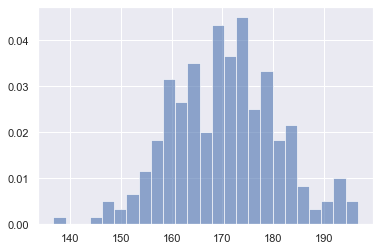

In [100]:
import numpy as np
import matplotlib.pyplot as plt
  
# Generating some random data
# for an example
data = np.random.normal(170, 10, 250)
  
# Plotting the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
  
plt.show()

In [101]:
# The data are skewly distributed, hence it is to be standardized 

In [102]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

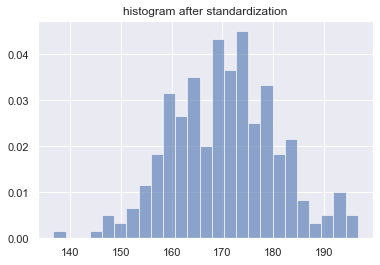

In [104]:
# Plotting the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
plt.title('histogram after standardization')  
plt.show()

# Exploratory Data Analysis

# One-Sample T-Test (Measuring Satisfaction Level)

In [189]:
# Let's compare the means of our employee turnover satisfaction against the employee population satisfaction
emp_population_satisfaction = data['satisfaction_level'].mean()
emp_turnover_satisfaction = data[data['left']==1]['satisfaction_level'].mean()

print( 'The mean for the employee population is: ' + str(emp_population_satisfaction) )
print( 'The mean for the employees that had a turnover is: ' + str(emp_turnover_satisfaction) )

The mean for the employee population is: 0.6128335222348166
The mean for the employees that had a turnover is: 0.44009801176140917


In [190]:
#conducting a t-test at 95% confidence level and see if it correctly rejects the null hypothesis that the sample comes from 
#the same distribution as the employee population

In [191]:
import scipy.stats as stats
stats.ttest_1samp(a=  data[data['left']==1]['satisfaction_level'], # Sample of Employee satisfaction who had a Turnover
                  popmean = emp_population_satisfaction)  # Employee Population satisfaction mean

Ttest_1sampResult(statistic=-39.10948894348446, pvalue=9.012781195378076e-279)

The test result shows the test statistic "t" is equal to -39.109. This test statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis.

In [192]:
#T-Test Quantile
#If the t-statistic value we calculated above (-39.109) is outside the quantiles, then we can reject the null hypothesis

In [193]:
degree_freedom = len(data[data['left']==1])

LQ = stats.t.ppf(0.025,degree_freedom)  # Left Quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))

The t-distribution left quartile range is: -1.9606285215955626
The t-distribution right quartile range is: 1.9606285215955621


T-Test = -39.109 | P-Value = 9.01e-279 | Reject Null Hypothesis

Reject the null hypothesis because:

T-Test score is outside the quantiles
P-value is lower than confidence level of 5%

Based on the statistical analysis of a one sample t-test, there seems to be some significant difference between the mean satisfaction of employees who had a turnover and the entire employee population. The super low P-value of 9.012e-279 at a 5% confidence level is a good indicator to reject the null hypothesis.

In [127]:
#Correlation Analysis
#The correlation is a very useful statitiscal analysis that describes the degree of relationship between two variables

<AxesSubplot:>

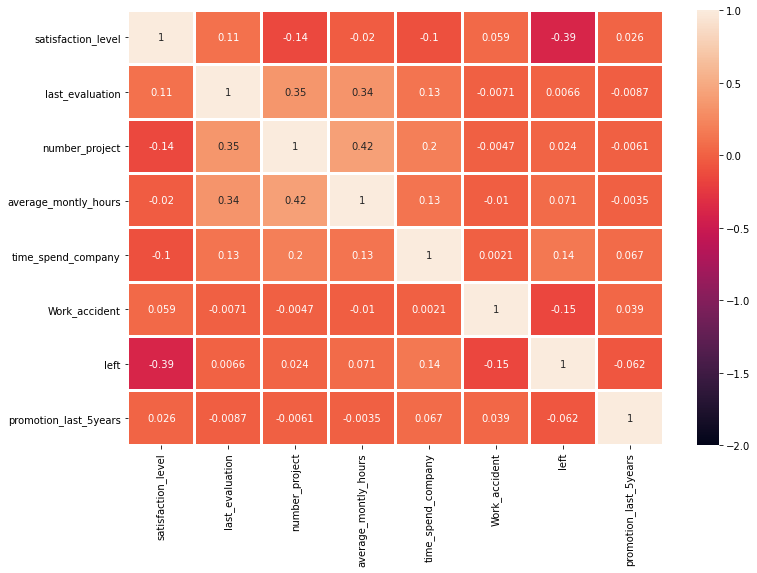

In [137]:
#import matplotlib.pyplot as plt
corrmatrix=data.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(corrmatrix,vmin=-2,vmax=1,linewidth=2,annot=True)

 From the heat map following inferences could be arrived:

There is Negative correlation of (-0.39) between satisfaction_level and the employees that left the company. The highest positive correlation is between number of projects and average monthly hours (0.42). Last_evaluation is high correlated to number_project(0.35)and average_monthly_hours(0.34). Work_accident have a low negative correlation(-0.15)and salary (-0.16) with employees that left.

# Univariate Analysis

# How many employees left the company?

C:\Users\We care\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


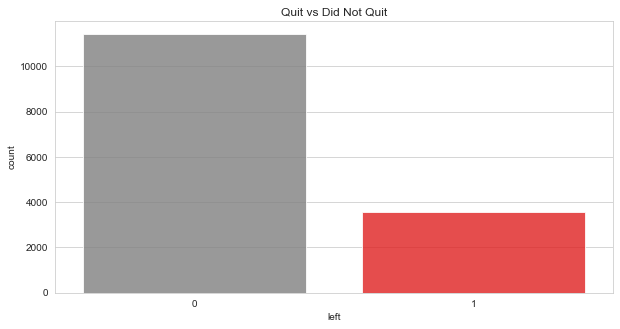

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,5))
sns.countplot(data['left'],palette = ['grey','red'], alpha =.80).set_title('Quit vs Did Not Quit')
plt.show()

In [12]:
print('Employees That Left:', len(data[data['left']==1]))
print('Employees That Have Not Left:', len(data[data['left']==0]))

Employees That Left: 3571
Employees That Have Not Left: 11428


Here, we can see out of 15,000 approx 3,571 were left, and 11,428 stayed. The no of employee left is 23 % of the total employment.

# Numeric Features vs Target Variable

In [48]:
# Statistical summary of employees that did not quit
data[data['left']==0].describe().transpose().head()

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,11428.0,0.666810,0.217104,0.12,0.54,0.69,0.84,1.0
last_evaluation,11428.0,0.715473,0.162005,0.36,0.58,0.71,0.85,1.0
number_project,11428.0,3.786664,0.979884,2.00,3.00,4.00,4.00,6.0
average_montly_hours,11428.0,199.060203,45.682731,96.00,162.00,198.00,238.00,287.0
time_spend_company,11428.0,3.380032,1.562348,2.00,2.00,3.00,4.00,10.0


Employees That Stay

The median satisfaction level of employees that quit is approx. 69%. They have 4 projects and work 198 hours a month, on average (49.5 hours/week). The average tenure of these individuals is 4 years.

In [49]:
# Stat summary of employees that quit
data[data['left']== 1].describe().transpose().head()

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,3571.0,0.440098,0.263933,0.09,0.13,0.41,0.73,0.92
last_evaluation,3571.0,0.718113,0.197673,0.45,0.52,0.79,0.90,1.00
number_project,3571.0,3.855503,1.818165,2.00,2.00,4.00,6.00,7.00
average_montly_hours,3571.0,207.419210,61.202825,126.00,146.00,224.00,262.00,310.00
time_spend_company,3571.0,3.876505,0.977698,2.00,3.00,4.00,5.00,6.00


Employees that Quit

The median satisfaction level is just 41% and clock in 224 hours a month (~56 hours/week). There are no employees that quit after 6 years of tenure.

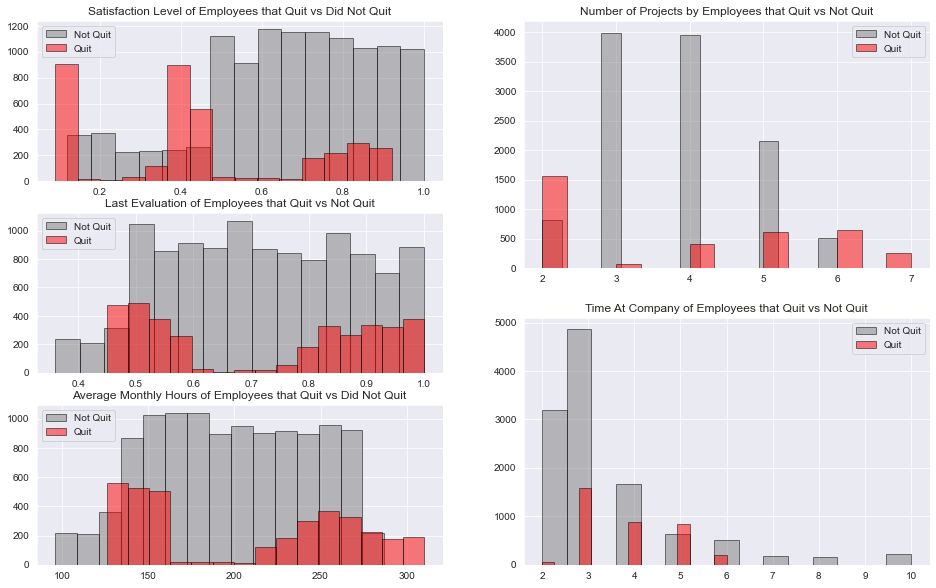

In [17]:
# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (16,10))

ax1 = fig.add_subplot(321)
ax1.hist(data[data['left'] ==0].satisfaction_level, bins = 15, label ='Not Quit', alpha = .50,edgecolor= 'black',color ='grey')
ax1.hist(data[data['left']==1].satisfaction_level, bins = 15, label = 'Quit', alpha = .50, edgecolor = 'black',color = 'red')
ax1.set_title('Satisfaction Level of Employees that Quit vs Did Not Quit')
ax1.legend(loc = 'upper left')

ax2 = fig.add_subplot(323)
ax2.hist(data[data['left']==0].last_evaluation, bins = 15, label = 'Not Quit', alpha = .50, edgecolor ='black', color = 'grey')
ax2.hist(data[data['left']==1].last_evaluation, bins = 15, label = 'Quit', alpha = .50, edgecolor = 'black',color ='red')
ax2.set_title('Last Evaluation of Employees that Quit vs Not Quit')
ax2.legend(loc = 'upper left')

ax3 = fig.add_subplot(325)
ax3.hist(data[data['left']==0].average_montly_hours, bins = 15, label = 'Not Quit', alpha = .50, edgecolor = 'black', color = 'grey')
ax3.hist(data[data['left']==1].average_montly_hours, bins= 15, label = 'Quit', alpha = .50, edgecolor = 'black', color ='red')
ax3.set_title('Average Monthly Hours of Employees that Quit vs Did Not Quit')
ax3.legend(loc = 'upper left')

ax4 = fig.add_subplot(222)
ax4.hist(data[data['left']==0].number_project, bins = 15, label = 'Not Quit', alpha = .50, edgecolor = 'black', color = 'grey')
ax4.hist(data[data['left']==1].number_project, bins = 15, label = 'Quit', alpha = .50, edgecolor = 'black', color = 'red')
ax4.set_title('Number of Projects by Employees that Quit vs Not Quit')
ax4.legend(loc = 'upper right')

ax5 = fig.add_subplot(224)
ax5.hist(data[data['left']==0].time_spend_company, bins = 15, label = 'Not Quit', alpha = .50, edgecolor = 'black', color = 'grey')
ax5.hist(data[data['left']==1].time_spend_company, bins = 15, label = 'Quit', alpha = .50, edgecolor = 'black', color = 'red')
ax5.set_title('Time At Company of Employees that Quit vs Not Quit')
ax5.legend(loc = 'upper right')
plt.show()

Additional Insights On Numeric Features

Of the employees that quit, most reported a satisfaction level of just 40%. The majority of employees that stayed with the company had a satisfaction level around 60%.

The distributions of the Last Evaluation and Average Monthly Hours variables for employees that quit appear to be bi-modal, which could be an indication of additional sub-groups present within the datset.

The majority of employees that quit had just two projects. Most employees that stay with the company have 3 or 4 projects.

There are no employees that quit after they've been there longer than 6 years. Most employees that leave the company do so around the 3 year mark.

# Categorical Features vs Target Variable

# Work Accidents

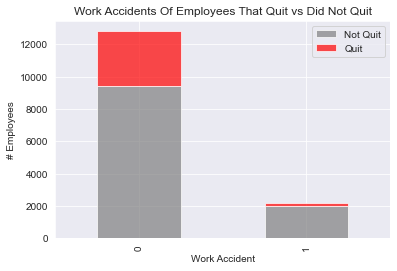

In [18]:
accident = data.groupby(['Work_accident','left']).Work_accident.count().unstack()
p1 = accident.plot(kind = 'bar', stacked = True, 
                   title = 'Work Accidents Of Employees That Quit vs Did Not Quit', 
                   color = ['grey','red'], alpha = .70)
p1.set_xlabel('Work Accident')
p1.set_ylabel('# Employees')
p1.legend(['Not Quit','Quit'])
plt.show()

In [19]:
print(data.Work_accident.sum())
print(data.Work_accident.mean()*100)
print((data[data['left']==1]['Work_accident']).sum())

2169
14.46096406427095
169


# Promotions

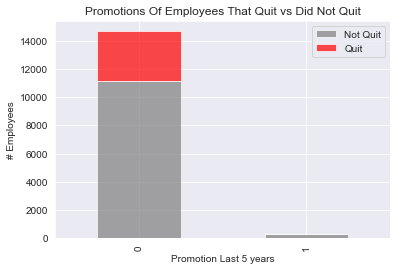

In [20]:
promotion = data.groupby(['promotion_last_5years','left']).promotion_last_5years.count().unstack()
p2 = promotion.plot(kind = 'bar', stacked = True, 
                    title = 'Promotions Of Employees That Quit vs Did Not Quit', 
                    color = ['grey','red'], alpha = .70)
p2.set_xlabel('Promotion Last 5 years')
p2.set_ylabel('# Employees')
p2.legend(['Not Quit','Quit'])
plt.show()

In [21]:
print(data.promotion_last_5years.sum())
print(data.promotion_last_5years.mean())

319
0.021268084538969265


# Departments

In [230]:
data['department'].value_counts()/len(data)*100

sales          27.601840
technical      18.134542
support        14.860991
IT              8.180545
product_mng     6.013734
marketing       5.720381
RandD           5.247016
accounting      5.113674
hr              4.926995
management      4.200280
Name: department, dtype: float64

# Salary Levels

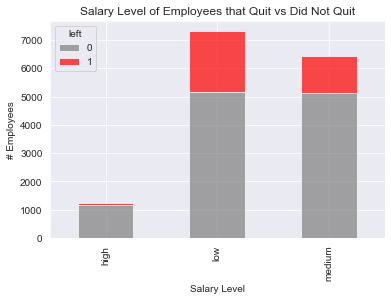

In [41]:
salary = data.groupby(['salary','left']).salary.count().unstack()
p4 = salary.plot(kind = 'bar', stacked = True,
                 title = 'Salary Level of Employees that Quit vs Did Not Quit', 
                 color = ['grey','red'], alpha = .70)
p4.set_xlabel('Salary Level')
p4.set_ylabel('# Employees')
plt.show()

 Categorical Variable Insights

A small proportion of employees who suffered a work accident end up quitting. All the employees that quit have not had a promotion in the last 5 years. Among the employees that left, a greater proportion work in Sales, Tech, and Support Departments. A very low proportion of high salaried employees quit.

EDA CONCLUSIONS:

Features that greatly influence a person's likelihood of leaving the company are as follows:

Salary: Not surprisingly, a very small proportion of high salaried employees leave the company. There is a higher proportion of employees that quit among the mid or low salary groups.

Time with Company: The three year mark seems to be a critical point in an employee's career. Individuals who are going to quit, tend do so around the three year mark with the company. Once a person reaches 6 years of tenure, they are very unlikely to leave at that point.

Number Of Projects: In addition to tenure, employee engagement is another contributing factor to a person's likelihood of leaving the company. Employees that quit are assigned to a low number of projects relative to their colleagues that work on many projects and tend to stay with the company.

Promotions: Whether an employee is moving up in the organization is also a feature of interest. Employees are far more likely to quit if they haven't recevied a promotion in the last 5 years.

Department: Individuals that works in Sales, Tech, or Support Departments has a greater likelihood of leaving the company relative to employees of other departments.

# Logistic Regression

In [90]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [64]:
# LogisticRegression of data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score

In [65]:
#Spilting data into test and train split:
x=data.drop(['left'],axis=1)
y=data['left']

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state= 101)

# Import model
from sklearn.linear_model import LogisticRegression

# Create instance of model
classifier = LogisticRegression(max_iter=10000)

# Fit to training set
classifier.fit(x_train,y_train) 
# Predict
y_pred = classifier.predict(x_test)

# Create confusion matrix
print(confusion_matrix(y_test,y_pred))  

# Create classification report
print(classification_report(y_test,y_pred))

# Accuracy score
print('Accuracy',accuracy_score(y_test, y_pred)*100,'%')

[[2102  160]
 [ 469  269]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2262
           1       0.63      0.36      0.46       738

    accuracy                           0.79      3000
   macro avg       0.72      0.65      0.67      3000
weighted avg       0.77      0.79      0.77      3000

Accuracy 79.03333333333333 %


In [67]:
# Initiatlize the model
logreg = LogisticRegression(solver='liblinear', random_state = 0)

# Fit the model
logreg.fit(x_train, y_train.values.ravel())

# Predict data points 
y_pred_test = logreg.predict(x_test)

# Print accuracy scores
print(f'Model accuracy score: {round(accuracy_score(y_test, y_pred_test) * 100, 2)}%')

Model accuracy score: 79.1%


In [68]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error
logreg.fit(x_train,y_train)
pred_y = logreg.predict(x_test)
test_rmse = MSE(y_test, pred_y) ** (1 / 2)
print('RMSE test set: {:.2f}'.format(test_rmse))

RMSE test set: 0.46


# Decision Tree Classifier

In [180]:
#Spilting data into test and train split:
x=data.drop(['left'],axis=1)
y=data['left']

In [181]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [182]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [183]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
#DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=3,min_samples_leaf=int(0.05*len(x_train)),random_state=19)
boosted_dt=AdaBoostClassifier(dt,algorithm='SAMME',n_estimators=800,learning_rate=0.5)
boosted_dt.fit(x_train,y_train.values.ravel())
y_predicted=boosted_dt.predict(x_test)

print ("Area under ROC curve: %f"%(roc_auc_score(y_test, y_predicted)))

Area under ROC curve: 0.953796


In [184]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error
dt.fit(x_train,y_train)
pred_y = dt.predict(x_test)
test_rmse = MSE(y_test, pred_y) ** (1 / 2)
print('RMSE test set: {:.2f}'.format(test_rmse))

RMSE test set: 0.24


# SVM Model

In [186]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)
print('Accuracy using linear svm is :',accuracy_score(y_test,y_pred))

Accuracy using linear svm is : 0.7701333333333333


In [187]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error
svm_linear.fit(x_train,y_train)
pred_y = svm_linear.predict(x_test)
test_rmse = MSE(y_test, y_pred) ** (1 / 2)
print('RMSE test set: {:.2f}'.format(test_rmse))

RMSE test set: 0.48


# Fine tuning of hyper parameter

In [185]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn import datasets

In [186]:
# Splitting dataset
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 42)
gbr = GradientBoostingRegressor(n_estimators = 200, max_depth = 1, random_state = 42)  

In [187]:
# Fit to training set
gbr.fit(train_x, train_y)
  
# Predict on test set
pred_y = gbr.predict(test_x)
  
# test set RMSE
test_rmse = MSE(test_y, pred_y) ** (1 / 2)
  
# Print rmse
print('RMSE test set: {:.2f}'.format(test_rmse))

RMSE test set: 0.26


In [188]:
#Spilting data into test and train split:
x=data.drop(['left'],axis=1)
y=data['left']

In [189]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [190]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

# KNN

In [83]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [84]:
acc_values

[0.9273333333333333,
 0.918,
 0.9216666666666666,
 0.9263333333333333,
 0.929,
 0.9316666666666666,
 0.931,
 0.9326666666666666,
 0.9336666666666666,
 0.9363333333333334,
 0.9336666666666666,
 0.9303333333333333]

Text(0, 0.5, 'accuracy')

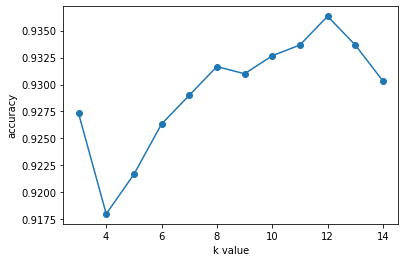

In [85]:
plt.plot(neighbors,acc_values,'-o')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [86]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=12)
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [87]:
acc_values

[0.9363333333333334,
 0.9363333333333334,
 0.9363333333333334,
 0.9363333333333334,
 0.9363333333333334,
 0.9363333333333334,
 0.9363333333333334,
 0.9363333333333334,
 0.9363333333333334,
 0.9363333333333334,
 0.9363333333333334,
 0.9363333333333334]

In [88]:
print('accuracy is',accuracy_score(y_test,y_pred))

accuracy is 0.9363333333333334


Text(0, 0.5, 'accuracy')

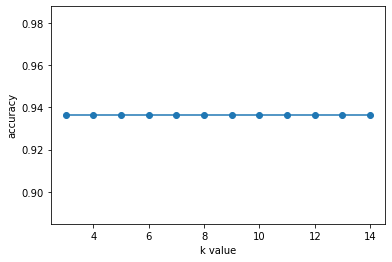

In [89]:
plt.plot(neighbors,acc_values,'-o')
plt.xlabel('k value')
plt.ylabel('accuracy')

# Random Forest Regressor

In [200]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

rf.fit(x_train, np.ravel(y_train))
y_pred=rf.predict(x_test)
from sklearn.metrics import f1_score,confusion_matrix
f1_score(y_test,y_pred)

0.9717514124293785

In [201]:
gb.fit(x_train,y_train)
pred_y = gb.predict(x_test)
test_rmse = MSE(y_test, pred_y) ** (1 / 2)
print('RMSE test set: {:.2f}'.format(test_rmse))

RMSE test set: 0.17


RandomForestRegressor Model has the lowest RMSE and highest accuracy , which tells us that it’s able to fit the dataset the best out of the five potential models.